In [24]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv("churn_df.csv")

X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [25]:
import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
y_pred = knn.predict(X_new)
print("Predictions:", y_pred)

Predictions: [0 1 0]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                   random_state=21,
                                                   stratify=y)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

0.854


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
dict_values([0.771, 0.854, 0.845, 0.857, 0.856, 0.858, 0.857, 0.854, 0.853, 0.854, 0.851, 0.854, 0.855, 0.854, 0.854, 0.854, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855])


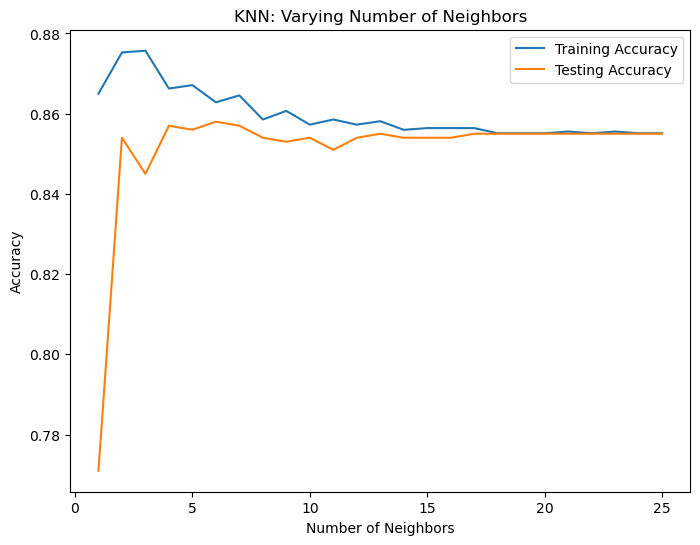

In [27]:
from matplotlib import pyplot as plt


train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
print(neighbors)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

#print(train_accuracies.values())
print(test_accuracies.values())
my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())

plt.figure(figsize=(8,6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, my_train, label='Training Accuracy')
plt.plot(neighbors, my_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
print(X.shape, y.shape)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

(3333, 7) (3333,)
0.8455772113943029


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8758439609902475, np.int64(3): 0.881470367591898, np.int64(4): 0.8649662415603901, np.int64(5): 0.8675918979744937, np.int64(6): 0.8593398349587397, np.int64(7): 0.8612153038259565, np.int64(8): 0.8552138034508627, np.int64(9): 0.8563390847711928, np.int64(10): 0.8552138034508627, np.int64(11): 0.8548387096774194, np.int64(12): 0.8552138034508627} 
 {np.int64(1): 0.7796101949025487, np.int64(2): 0.848575712143928, np.int64(3): 0.8350824587706147, np.int64(4): 0.8470764617691154, np.int64(5): 0.8455772113943029, np.int64(6): 0.8530734632683659, np.int64(7): 0.8530734632683659, np.int64(8): 0.8545727136431784, np.int64(9): 0.8530734632683659, np.int64(10): 0.8545727136431784, np.int64(11): 0.8545727136431784, np.int64(12): 0.8545727136431784}


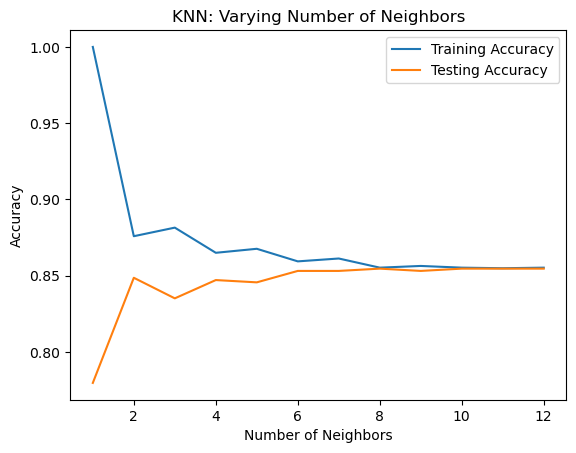

In [29]:
#Ex3 Over/Underfitting
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
	  
  	# Fit the model
    knn.fit(X_train, y_train)
  
  	# Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
# Plot training accuracies
plt.plot(neighbors, my_train, label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, my_test, label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()


(768, 7)


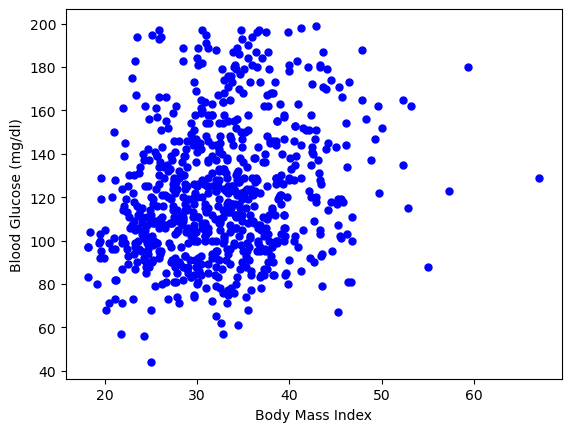

In [30]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)
print(diabetes_df.shape)
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
X = diabetes_df.drop('glucose', axis=1).values
# X_bmi = diabetes_df['bmi'].values

y = diabetes_df['glucose'].values
X_bmi = X[:,3]
X_bmi = X_bmi.reshape(-1,1)
plt.scatter(X_bmi, y, s = 25, color = 'blue')
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
#plt.grid(True)
plt.show()


           tv     radio  social_media      sales
0     16000.0   6566.23       2907.98   54732.76
1     13000.0   9237.76       2409.57   46677.90
2     41000.0  15886.45       2913.41  150177.83
3     83000.0  30020.03       6922.30  298246.34
4     15000.0   8437.41       1406.00   56594.18
...       ...       ...           ...        ...
4541  26000.0   4472.36        717.09   94685.87
4542  71000.0  20610.69       6545.57  249101.92
4543  44000.0  19800.07       5096.19  163631.46
4544  71000.0  17534.64       1940.87  253610.41
4545  42000.0  15966.69       5046.55  148202.41

[4546 rows x 4 columns]
(4546, 1) (4546,)
[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


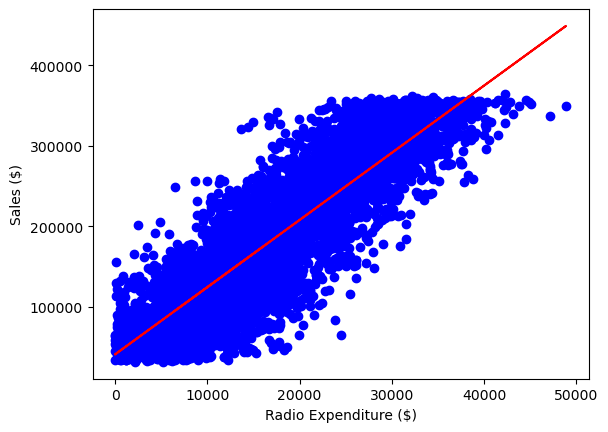

In [31]:
#slide 33 - 34
sales_df = pd.read_csv('sales_df.csv', index_col = 0)
print(sales_df)
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()


In [32]:
#Solution for slide 41
from sklearn.metrics import mean_squared_error

sales_df = pd.read_csv('sales_df.csv', index_col = 0)
# Create X and y arrays
print(sales_df.head())
X = sales_df.drop("sales", axis=1).values

y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiate the model
reg = LinearRegression()
# Fit the model to the data
reg.fit(X_train, y_train)
# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))
# Compute R-squared
r_squared = reg.score(X_test, y_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))


        tv     radio  social_media      sales
0  16000.0   6566.23       2907.98   54732.76
1  13000.0   9237.76       2409.57   46677.90
2  41000.0  15886.45       2913.41  150177.83
3  83000.0  30020.03       6922.30  298246.34
4  15000.0   8437.41       1406.00   56594.18
Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]
R^2: 0.9990152104759368
RMSE: 2944.433199600101


In [33]:
#cross validation – slide 46
from sklearn.model_selection import KFold, cross_val_score
sales_df = pd.read_csv('sales_df.csv', index_col = 0)
# Create X and y arrays
print(sales_df.head())
#X = sales_df[[“radio", “social_media"]].values
X = sales_df.drop(["tv","sales"], axis=1).values
y = sales_df["sales"].values
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(f'CV scores: {cv_scores}')
# Print the mean
print(f'Mean: {np.mean(cv_scores)}')
# Print the standard deviation
print(f'STD:  {np.std(cv_scores)}')
# Print the 95% confidence interval
print(f'Confidence interval: {np.quantile(cv_scores, [0.025, 0.975])}')


        tv     radio  social_media      sales
0  16000.0   6566.23       2907.98   54732.76
1  13000.0   9237.76       2409.57   46677.90
2  41000.0  15886.45       2913.41  150177.83
3  83000.0  30020.03       6922.30  298246.34
4  15000.0   8437.41       1406.00   56594.18
CV scores: [0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]
Mean: 0.7536937414361207
STD:  0.012305389070474737
Confidence interval: [0.74141863 0.77191916]
